# Введение в машинное обучение для Java-разработчиков
### Практическое задание 1. Линейная регрессия
### Дата выдачи: 18.10.2023

### Дедлайн: 23:59MSK 01.11.2023

## О задании
В этом задании мы попытаемся разобраться в механизме линейной регрессии. 

## Оценивание и штрафы
Каждая из задач (помечены тегом [task]) имеет определенное количество баллов (указана в скобках около задачи). Максимально допустимая оценка за работу — 16 баллов. 

- от 4 до 9 баллов - оценка "3"
- от 10 до 16 баллов - оценка "4"
- 17 баллов - оценка "5"

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов, что автоматически ведет к несдаче курса. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в комментариях. 
В данном задании есть необязательные бонусные задания, выполнение которых добавляет баллы в карму :)

## Формат сдачи
Задания сдаются путем форка основного репозитория, коммита решения в мастер-ветку вашего форка и оповещении преподавателя о выполнении ДЗ. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

[17]

## Часть 1. Одномерная линейная регрессия

Замечание: мы будем реализовывать линейную регрессию, при условии, что свободный коэффициент равен нулю

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# заменил эту строчку, потому что предыдущая выдавала ошибку
sns.set_theme()
sns.set('notebook', font_scale=1.25, style='whitegrid')

### [task] Прокомментируйте каждую строчку кода в функции create_dataset (1 балл)

In [166]:
def create_dataset(n, slope, noise_stddev, random_state=0):
    # RandomState используется для генерации псевдослучайных чисел.
    # Одна и та же серия вызовов методов RandomState всегда будет давать одни и те же результаты,
    # если при инициализации seed был одиноковым
    random_state = np.random.RandomState(int(random_state))
    #linspace возвращает n чисел равномерно распределенных в заданном интервале
    x_n = np.linspace(-2, 2, n)
    # получаем ndarray значений y,где
    # угол наклона прямой(slope) равен константе из параметров функции, что является признаком одномерной линейной регрессии
    # второе слагаемое является некоторой погрешностью, которая генерируется с помощью генератора случайных чисел
    y_n = slope * x_n + random_state.randn(n) * noise_stddev
    # возращаем кортеж с полученными значениями
    return x_n, y_n

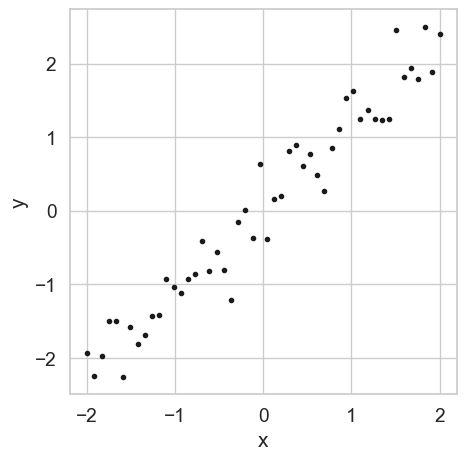

In [167]:
x, y = create_dataset(n=50, slope=1.234, noise_stddev=0.3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x, y, 'k.');
plt.xlabel('x');
plt.ylabel('y');

### [task] Реализуйте функции расчета результата 1-мерной линейной модели и MSE (1 балл за каждую фунцкию)

In [123]:
def predict_1d(x, w):
    return x * w

def calc_mean_squared_error(yhat_N, y_N):
    return np.mean((yhat_N - y_N) ** 2)

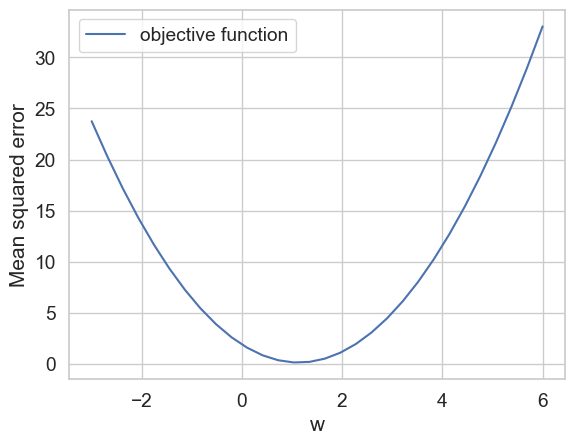

In [124]:
G = 30
w_candidates_G = np.linspace(-3, 6, G)
error_G = np.zeros(G)
for i, w in enumerate(w_candidates_G):
    yhat_N = predict_1d(x, w)
    error_G[i] = calc_mean_squared_error(yhat_N, y)
plt.plot(w_candidates_G, error_G, label='objective function');
plt.xlabel('w');
plt.ylabel('Mean squared error');
plt.legend()

### [task] Найдите методом пристального взгляда по графику из прошлого пункта оптимальное значение параметра w и подставьте найденное значение в переменную w (1 балл)

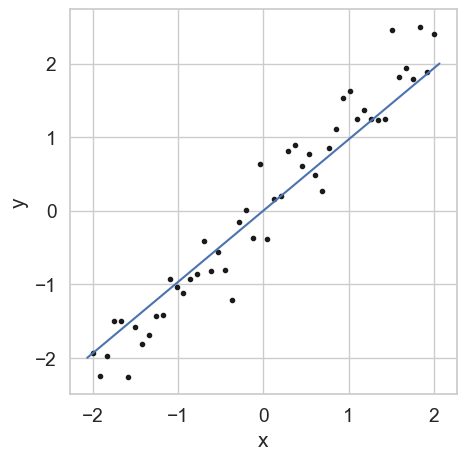

In [125]:
w = w_candidates_G[np.argmin(error_G)] 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x, y, 'k.');
plt.plot([predict_1d(-2,w), predict_1d(2,w)], [-2,2])
plt.xlabel('x');
plt.ylabel('y');

### [task] Что происходит с линейной моделью, когда меняется параметр w (1 балл)?

Мы изменяем наклон нашей линейной регрессии, когда меняется параметр w

## Часть 2. Градиентный спуск

### [task] Реализуйте функцию потерь RSS (1 балл)

In [126]:
def calc_loss(x, y, w):
    return np.sum((y - x * w) ** 2)

### [task] Реализуйте функцию расчета градиента (2 балл)

hint: Продифференцируйте функцию потерь RSS

In [159]:
def calc_grad(x, y, w):
    return -2 * np.sum(x * (x * w - y)) / len(x)

### [task] Допишите код для обновления весов (2 балла)

In [168]:
def minimize_via_grad_descent(calc_loss, calc_grad, init_w=0.0, step_size=0.001, max_iters=20):
    w = init_w 
    for iter_id in range(max_iters):
        loss = calc_loss(x, y, w)
        grad = calc_grad(x, y, w)
        print(f"Loss = {loss}, grad = {grad}, w = {w}")
        w += grad * step_size
    wopt = w    
    return wopt

In [176]:
wopt = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.05, max_iters=50);

Loss = 93.31971643792791, grad = 3.1311316443163286, w = 0.0
Loss = 70.51044434322476, grad = 2.696607252860184, w = 0.15655658221581645
Loss = 53.5926333823205, grad = 2.3223842055244854, w = 0.29138694485882566
Loss = 41.04456404803613, grad = 2.000094152512924, w = 0.40750615513504995
Loss = 31.737565383618403, grad = 1.722530066041743, w = 0.5075108627606961
Loss = 24.83449353791175, grad = 1.4834850772849295, w = 0.5936373660627833
Loss = 19.714432535950806, grad = 1.277613678804572, w = 0.6678116199270298
Loss = 15.916844266591319, grad = 1.1003121886847538, w = 0.7316923038672584
Loss = 13.10014410265706, grad = 0.9476158033162574, w = 0.786707913301496
Loss = 11.010976122673437, grad = 0.8161099367335932, w = 0.8340887034673089
Loss = 9.46142430864843, grad = 0.702853863880768, w = 0.8748942003039886
Loss = 8.312109917774507, grad = 0.6053149603218043, w = 0.910036893498027
Loss = 7.459654674191035, grad = 0.5213120678689827, w = 0.9403026415141171
Loss = 6.827382122761135, gra

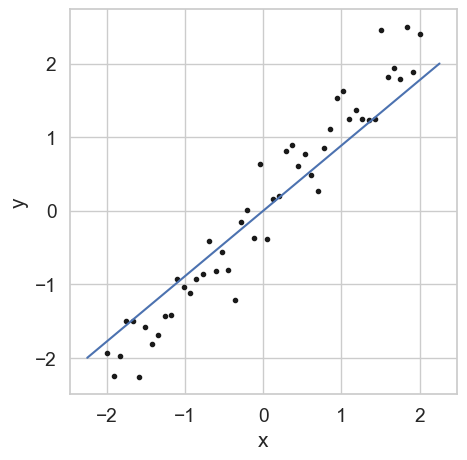

In [177]:
w = wopt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x, y, 'k.');
plt.plot([predict_1d(-2,w), predict_1d(2,w)], [-2,2])
plt.xlabel('x');
plt.ylabel('y');

### [task] Что будет если сделать слишком маленький шаг или слишком большой (1 балл)
hint: Попробуйте увеличить число итераций

Если шаг слишком маленький, то потребуется много итераций, чтобы все сошлось. 
Если шаг слишком большой, то мы можем пропустить наш минимум.

## Часть 3. 

В данной части мы будем учиться использовать готовую реализацию линейной регрессии из библиотеки scikit-learn на небольшой, но реальной задаче из медицины. Обязательно изучите описание датасета (признаки и целевая переменная).

In [207]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes(as_frame=True)
data = diabetes["frame"]
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [208]:
X = data.drop(labels='target', axis=1) 
y = data['target']

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


### [task] Напишите код для обучения модели и предсказания модели на тестовой выборке (2 балла)
Чтобы выполнить задание, воспользуйтесь документацией для класса SGDRegressor

In [249]:
model = SGDRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# Возникло предупреждение о том, что надо изменить один из гиперпараметров(max_iter),
# потому что максимальное количество итераций достигнуто до сходимости

Mean Squared Error (MSE): 3142.948650971611


/home/pavel/miniconda3/envs/introToML/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### [task] Попробуйте улучшить результат за счет изменения гиперпараметров линейной модели (2 балла)

In [250]:
model = SGDRegressor(max_iter = 10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2807.516131506718


### Какие признаки больше всего влияют на целевую переменную? Выберите 3 признака. (2 балла)
hint: посмотрите на полученные веса модели

In [251]:
print(model.coef_)
# bmi, bp, s5 наиболее сильно влияют на целевую переменную

[  55.73239387 -173.66266514  472.94520769  324.40451358  -70.52695482
 -103.55707758 -229.30220472  148.09612827  339.75316562  107.20355449]


# Бонусные вопросы:
- Если вы нашли признаки, которые наибольшим образом влияют на модель, проверьте согласуется ли это с медициной в реальности ?
- Есть ли какие-то проблемы в текущей схеме обучения и валидации модели? 

Ответы пишите в ячейке ниже

In [ ]:
#